# Testing Models and Model Scores

### Methods

In [19]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor


### Loading Data

In [20]:
# load data

df = pd.read_csv("Merged_modeling_income.csv")
df.head()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,id,host_id,...,coffee,view,average_review_sentiment_score,description_FRES_score,title_sentiment_score,host_about_sentiment_score,neighborhood_overview_score,bookings_per_year,estimated_ococcupancy_rate,log_price
0,33.123882,1976.299663,38825.366808,9.153213e+05,3.368985e+05,5.784228e+05,4.428691e+06,2015.691394,739333866230665371,3013025,...,False,False,0.000000,73.03,0.58590,0.000000,0.0,0.00,0.000000,4.488636
1,18.532075,1990.192453,17624.192453,3.774487e+05,1.334875e+05,2.439612e+05,1.853208e+01,2015.558491,572612125615500056,358089614,...,True,False,0.479152,77.53,0.23765,0.000000,0.0,5.04,0.069041,3.806662
2,181.050870,1990.666667,185795.860776,2.733890e+06,1.407035e+06,1.326855e+06,9.316653e+06,2015.752343,45267941,39162543,...,False,False,0.000000,0.00,0.00000,0.000000,0.0,0.00,0.000000,4.672829
3,89.025476,1955.362911,105179.984234,4.418728e+06,1.352718e+06,3.066010e+06,2.399522e+07,2015.336281,838141198693830649,148571080,...,False,False,0.000000,0.00,0.31820,0.403333,0.0,0.00,0.000000,4.941642
4,33.123882,1976.299663,38825.366808,9.153213e+05,3.368985e+05,5.784228e+05,4.428691e+06,2015.691394,1082660771919357919,394869975,...,False,False,0.000000,85.69,0.00000,0.000000,0.0,0.00,0.000000,5.828946


In [21]:
df.shape

(42430, 58)

In [22]:
# Convert Bool columns to int to avoid any errors
df[['oven','stove', 'refrigerator', 'air conditioning', 'tv', 'parking',
    'gym/exercise equipment', 'pool', 'hygiene products', 'laundry',
    'coffee', 'view']] = df[['oven','stove', 'refrigerator', 'air conditioning', 'tv', 'parking',
                            'gym/exercise equipment', 'pool', 'hygiene products', 'laundry',
                            'coffee', 'view']].astype(int)

In [23]:
df_condensed = df.drop(columns=['id', 'host_id', 'host_since', 'neighbourhood_cleansed', 'host_listings_count', "host_total_listings_count", "host_is_superhost"])

In [24]:
df_train, df_test = train_test_split(df_condensed, test_size=0.2, random_state=42)

In [25]:
df.columns

Index(['Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income',
       'Estimated Expense', 'Net Operating Income', 'Full Market Value',
       'Report Year', 'id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'review_scores_rating', 'license',
       'instant_bookable', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'num_amenities', 'oven',
       'stove', 'refrigerator', 'air conditioning', 'tv', 'parking',
       'gym/exercise equipment', 'pool',

In [26]:
df.dtypes

Total Units                                     float64
Year Built                                      float64
Gross SqFt                                      float64
Estimated Gross Income                          float64
Estimated Expense                               float64
Net Operating Income                            float64
Full Market Value                               float64
Report Year                                     float64
id                                                int64
host_id                                           int64
host_since                                       object
host_response_time                               object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                 int64
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                            

In [27]:
# create X and y for train data
X_train = df_train.drop(columns=["bookings_per_year"])
y_train = df_train["bookings_per_year"]

# create X and y for test data
X_test = df_test.drop(columns=["bookings_per_year"])
y_test = df_test["bookings_per_year"]

In [28]:
y_log = np.log1p(y_train)

In [29]:
cat_feats = ["host_response_time", "neighbourhood_group_cleansed", "room_type", "license"]

model = CatBoostRegressor(iterations=5000,
                          depth=6,
                          learning_rate=0.1,
                          loss_function='RMSE',
                          cat_features=cat_feats
                          )

model.fit(X_train, y_log, eval_set=(X_test, np.log1p(y_test)), early_stopping_rounds=1000, verbose=100)

0:	learn: 1.3745924	test: 1.3876559	best: 1.3876559 (0)	total: 13.3ms	remaining: 1m 6s
100:	learn: 0.0612848	test: 0.0683502	best: 0.0683502 (100)	total: 1.06s	remaining: 51.3s
200:	learn: 0.0526568	test: 0.0639533	best: 0.0639533 (200)	total: 2.19s	remaining: 52.4s
300:	learn: 0.0461879	test: 0.0605282	best: 0.0605282 (300)	total: 3.26s	remaining: 50.8s
400:	learn: 0.0411912	test: 0.0585986	best: 0.0585986 (400)	total: 4.18s	remaining: 47.9s
500:	learn: 0.0369892	test: 0.0575915	best: 0.0575207 (473)	total: 5.09s	remaining: 45.7s
600:	learn: 0.0339135	test: 0.0569657	best: 0.0569601 (597)	total: 6.01s	remaining: 44s
700:	learn: 0.0313959	test: 0.0567300	best: 0.0567300 (700)	total: 6.93s	remaining: 42.5s
800:	learn: 0.0289977	test: 0.0566675	best: 0.0566089 (760)	total: 7.86s	remaining: 41.2s
900:	learn: 0.0269840	test: 0.0565449	best: 0.0565102 (877)	total: 8.77s	remaining: 39.9s
1000:	learn: 0.0252582	test: 0.0561445	best: 0.0561254 (961)	total: 9.68s	remaining: 38.7s
1100:	learn: 0

In [30]:
# Make predictions on the test set
y_pred_log = model.predict(X_test)

# Reverse the log transformation using np.expm1 to get the original scale
y_pred = np.expm1(y_pred_log)

# Calculate the Errors and R2
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# results
print('Test Mean Absolute Error: ', mae)
print('Test Root Mean Squared Error: ', rmse)
print('Test R^2 Score: ', r2)

Test Mean Absolute Error:  1.4365430829572727
Test Root Mean Squared Error:  13.810871000098539
Test R^2 Score:  0.8793014551058469


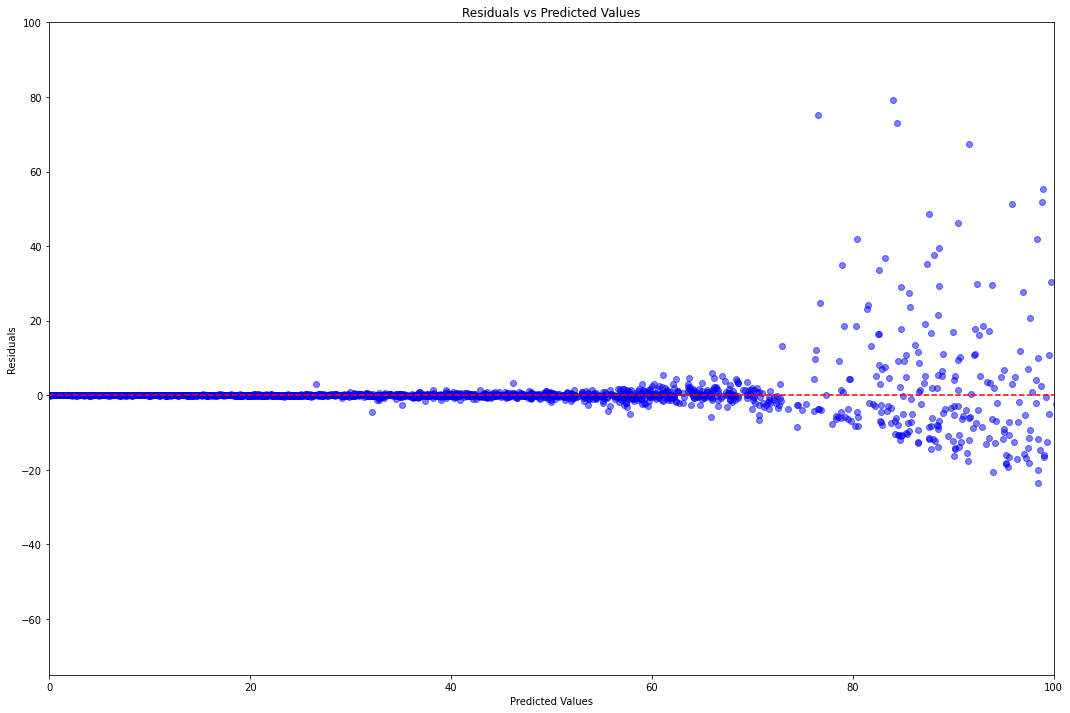

In [31]:
# Residuals plot
residuals = y_test - y_pred

plt.figure(figsize=(18, 12))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Line at 0
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.xlim(0, 100)
plt.ylim(-75, 100)

plt.show()

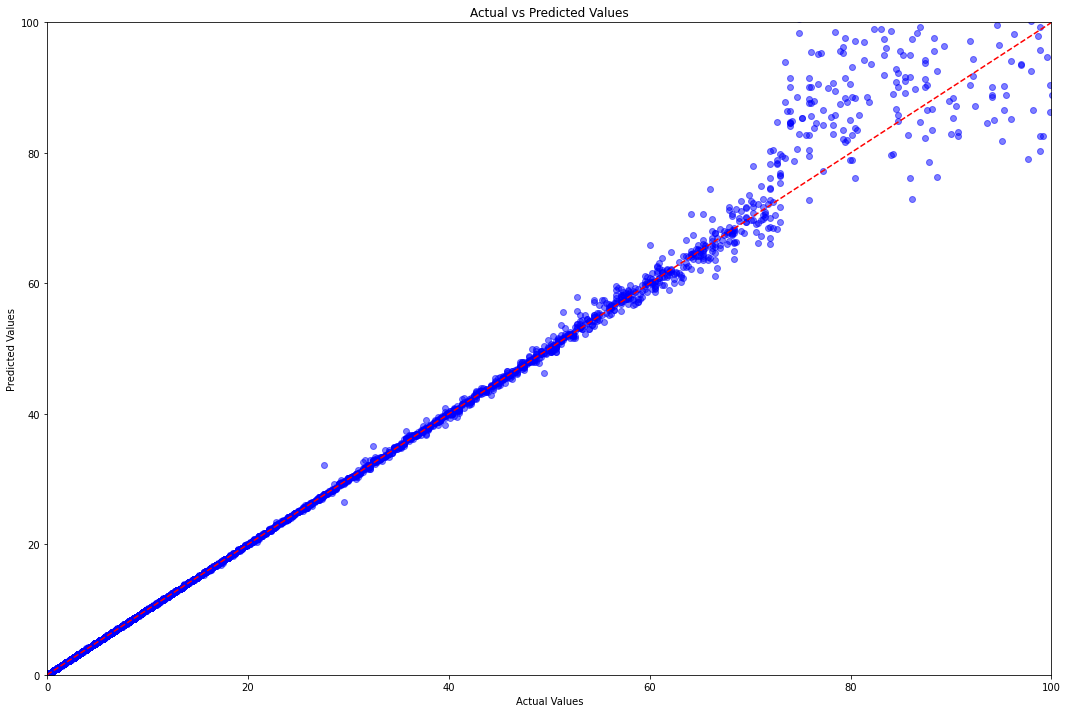

In [32]:

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(18, 12))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()


In [33]:
# Get feature importance
importances = model.get_feature_importance()

# Create a DataFrame to view the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(1))

                       Feature  Importance
48  estimated_ococcupancy_rate   92.506167


In [34]:
df["bookings_per_year"].mean()

# Just for more context

15.196621258543484